# Diseño  de Experimentos

El objetivo del diseño de experimentos es rechazar o aceptar una hipótesis. En análisis de algoritmos, podríamos formular una hipótesis respecto al desempeño de un algoritmo relacionado al tamaño del problema o bien a la capacidad de explotar mejores casos. 

El proceso de análisis comienza con la formulación de una hipótesis (por ejemplo, algoritmo A es mejor que el algoritmo B). Por lo tanto, el diseño experimental debe ser creado con el fin de probar esa hipótesis. Luego se recolectan y analizan datos. Finalmente se establecen conclusiones con respecto a la hipótesis. De manera de establecer conclusiones respecto al experimento, se debe utilizar inferencia estadística ya que necesitamos generalizar nuestros resultados a una población mayor que los datos observados. 


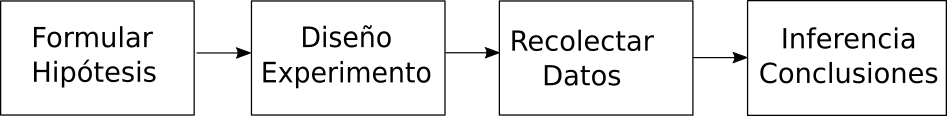

In [ ]:
from IPython.display import Image
Image(filename='images/experimentos.png')

# Pruebas de Hipótesis

Las pruebas de hipotesis sirven para comprobar la veracidad de una hipotesis nula (las medias de los dos grupos de estudio son iguales) versus una hipotesis alternativa. El valor-p es la probabilidad de rechazar una hipotesis nula. Si el valor-p es mayor o igual que un nivel de significancia (generalmente 5%), entonces la hipotesis nula puede ser rechazada. 

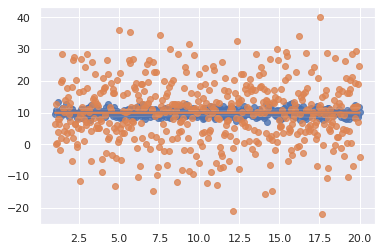

Ttest_indResult(statistic=0.1302083582629841, pvalue=0.8964278212955274)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="darkgrid")

samples=500

x=np.linspace(1,20,samples)

# medias iguales
y_1=np.random.normal(10,1,samples)
y_2=np.random.normal(10,10,samples)

sns.regplot(x=x, y=y_1, fit_reg=True)
sns.regplot(x=x, y=y_2, fit_reg=True)
plt.show()

print(stats.ttest_ind(y_1,y_2))

In [21]:
stat,p_value=stats.ttest_ind(y_1,y_2)
alpha=0.05
# interpret via p-value
if p_value > alpha:
	print('Acepta hipotesis nula que las medias son iguales.')
else:
	print('Rechaza hipotesis nula que las medias son iguales.')

Acepta hipotesis nula que las medias son iguales.


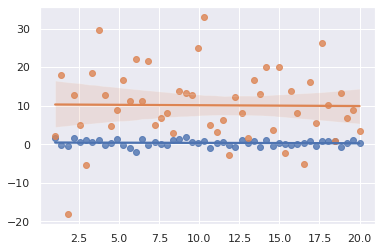

Ttest_indResult(statistic=-7.274215135356332, pvalue=8.65748347907658e-11)


In [36]:
# medias distintas
samples=50

x=np.linspace(1,20,samples)

y_3=np.random.normal(0,1,samples)
y_4=np.random.normal(10,10,samples)

sns.regplot(x=x, y=y_3, fit_reg=True)
sns.regplot(x=x, y=y_4, fit_reg=True)
plt.show()

print(stats.ttest_ind(y_3,y_4))

In [37]:
stat,p_value=stats.ttest_ind(y_3,y_4,equal_var=False)
alpha=0.05
# interpret via p-value
if p_value > alpha:
	print('Acepta hipotesis nula que las medias son iguales.')
else:
	print('Rechaza hipotesis nula que las medias son iguales.')

Rechaza hipotesis nula que las medias son iguales.


# Correlación

En estadistica se usa la correlación para definir la similtud entre dos variables aleatorias $X$ e $Y$. El criterio más comunmente usado es el coeficiente de Pearson, definido por:

$\rho_{X,Y}=\frac{\operatorname{COV}(X,Y)}{\sigma_x \sigma_y}$

Donde $\operatorname{COV}(X,Y)= \frac{\sum_i (x_i - \bar x)(y_i - \bar y)}{\sqrt{\sum_i (x_i - \bar x)^2} \sqrt{\sum_i (y_i - \bar y)^2}}$ es la covarianza entre $X$ e $Y$,  $\sigma_x$ la desviación estándar y $\bar x$ la media.

El coeficiente de correlación de Pearson mide la relación lineal entre dos variables Gaussianas. Sin embargo, las medias no necesariamente son iguales. La interpretación es que un valor $\rho_{X,Y}\approx 1$ significa una alta correlacion lineal. El valor $\rho_{X,Y}\approx 0$ implica que no hay correlacion y $\rho_{X,Y}\approx -1$ implica una correlación negativa (a medida que $x$ aumenta, el valor de $y$ disminuye).


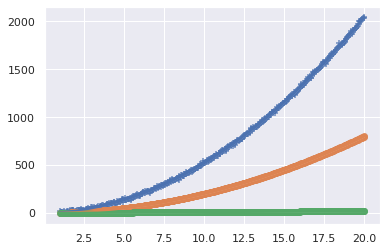

(0.9998676769772744, 0.0)


In [76]:
samples=500

x=np.linspace(1,20,samples)

y_5=5*x**2+2*x+np.random.normal(0,10,samples)
y_6=2*x**2

sns.regplot(x=x, y=y_5, fit_reg=True,order=2,marker="+")
sns.regplot(x=x, y=y_6, fit_reg=True,order=2)
sns.regplot(x=x, y=x, fit_reg=True)
plt.show()

print(stats.pearsonr(y_5, y_6))

In [75]:
print(stats.pearsonr(y_6, x))

(0.9681310233601597, 1.3342101682425112e-301)


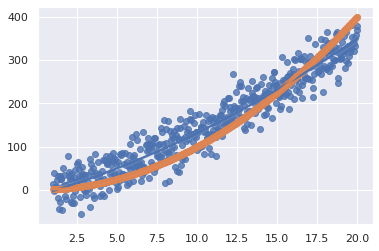

(0.9516249287469943, 2.2595748069309953e-257)


In [73]:
import math

samples=500

x=np.linspace(1,20,samples)

y_7=5*x*np.log(x)+2*x+np.random.normal(0,30,samples)
y_8=x**2

sns.regplot(x=x, y=y_7, fit_reg=True,order=2)
sns.regplot(x=x, y=y_8, fit_reg=True,order=2)
plt.show()

print(stats.pearsonr(y_7, y_8))

In [72]:
y_9=x*np.log(x)
print(stats.pearsonr(y_7, y_9))

(0.9999969737067962, 0.0)


# Regresión

La regresión lineal simple cuantifica el cambio de una variable dependiente $y$ cuando otra variable independiente varía $x$. Es decir, que tratamos de escribir la variable $y$ usando una relación lineal del tipo:

$y= w_o + w_1 x$

donde $w_o$ y $w_1$ son coeficientes que se estiman a partir de los datos. El intercepto $w_0$ cuantifica la variable $y$ para el valor $x=0$ y el coeficiente $w_1$ se interpreta como la pendiente de la recta (para cada incremento unitario de la variable $x$, la variable $y$ aumenta $w_1$ veces). 

En la practica, los coeficientes se estiman a través del método de mínimos cuadrados (OLS). Los parámetros estimados $\hat w_o$ y $\hat w_1$ pueden ser usados para predecir la variable dependiente $\hat y$ y de esa forma estimar el error residual:

$RSS= \sum_i (y_i-\hat y_i)^2$

Ahora es posible cuantificar la relación lineal entre las variables dependientes e independientes. La estadística $R^2$ es un valor entre $0$ y $1$ que a medida que aumenta, indica un mejor ajuste. 

$R^2= \frac{TSS-RSS}{TSS}$

donde $TSS=\sum_i (y_i-\bar y)^2$

[0.91890194 2.50233134]


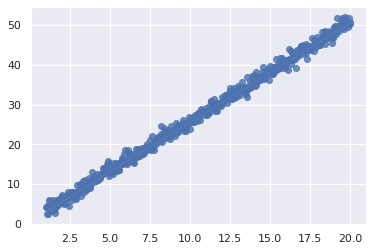

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.339e+04
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:12:45   Log-Likelihood:                -711.60
No. Observations:                 500   AIC:                             1427.
Df Residuals:                     498   BIC:                             1436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9189      0.097      9.469      0.0

In [105]:
import statsmodels.api as sm

samples=500

x=np.linspace(1,20,samples)

y_9=1.0+2.5*x+np.random.normal(0,1,samples)

x_1 = sm.add_constant(x)

model = sm.OLS(y_9, x_1).fit()

print(model.params)
sns.regplot(x=x, y=y_9, fit_reg=True)
plt.show()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              7525.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                   3.96e-303
Time:                        20:14:46   Log-Likelihood:                         -5719.0
No. Observations:                 500   AIC:                                  1.144e+04
Df Residuals:                     499   BIC:                                  1.144e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

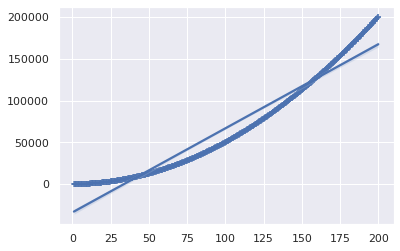

In [108]:
samples=500

x=np.linspace(1,200,samples)
y_10=5*x**2+2*x+np.random.normal(0,1,samples)

model = sm.OLS(y_10, x).fit()

print(model.summary())

sns.regplot(x=x, y=y_10, fit_reg=True,marker='+')
plt.show()


[2.00146166 4.99998849]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.019e+12
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:17:28   Log-Likelihood:                         -709.36
No. Observations:                 500   AIC:                                      1423.
Df Residuals:                     498   BIC:                                      1431.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

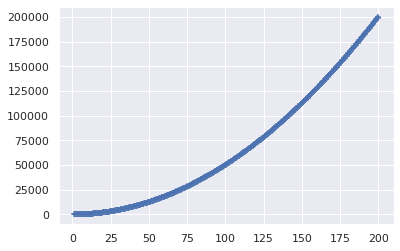

In [112]:
samples=500

x=np.linspace(1,200,samples)
x_1= np.vstack([x,x**2]).transpose()
y_10=5*x**2+2*x+np.random.normal(0,1,samples)
model = sm.OLS(y_10, x_1).fit()
print(model.params)
print(model.summary())

sns.regplot(x=x, y=y_10, fit_reg=True,marker='+',order=2)
plt.show()


In [95]:
y_10.shape

(500,)

In [96]:
x_1.shape

(2, 500)